## Observations and Insights

## Dependencies and starter code

In [175]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

mouse_data = pd.DataFrame(pd.merge(mouse_metadata,study_results,left_on = ["Mouse ID"],right_on = ["Mouse ID"]))


## Summary statistics

In [176]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_group = mouse_data.groupby("Drug Regimen")

drug_stat = pd.DataFrame(drug_group["Tumor Volume (mm3)"].mean())

drug_group["Tumor Volume (mm3)"].median()

drug_stat = pd.DataFrame(pd.merge(drug_stat,drug_group["Tumor Volume (mm3)"].median(),left_on = ["Drug Regimen"],right_on = ["Drug Regimen"]))

drug_stat = drug_stat.rename(columns = {"Tumor Volume (mm3)_x":"Mean of Tumor Volume (mm3)",
                                                         "Tumor Volume (mm3)_y":"Median of Tumor Volume (mm3)" })

drug_stat = pd.DataFrame(pd.merge(drug_stat,drug_group["Tumor Volume (mm3)"].std(),left_on = ["Drug Regimen"],right_on = ["Drug Regimen"]))

drug_stat = pd.DataFrame(pd.merge(drug_stat,drug_group["Tumor Volume (mm3)"].var(),left_on = ["Drug Regimen"],right_on = ["Drug Regimen"]))

drug_stat = pd.DataFrame(drug_stat.rename(columns = {"Tumor Volume (mm3)_x":"Standard Deviation of Tumor Volume (mm3)",
                                                         "Tumor Volume (mm3)_y":"Variance of Tumor Volume (mm3)" }))

drug_stat



,Mean of Tumor Volume (mm3),Median of Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),Variance of Tumor Volume (mm3)
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764
Ceftamin,52.591172,51.776157,6.268188,39.290177
Infubinol,52.884795,51.820584,6.567243,43.128684
Ketapril,55.235638,53.698743,8.279709,68.553577
Naftisol,54.331565,52.509285,8.134708,66.173479
Placebo,54.033581,52.288934,7.821003,61.168083
Propriva,52.322552,50.854632,6.507770,42.351070
Ramicane,40.216745,40.673236,4.846308,23.486704
Stelasyn,54.233149,52.431737,7.710419,59.450562


## Bar plots

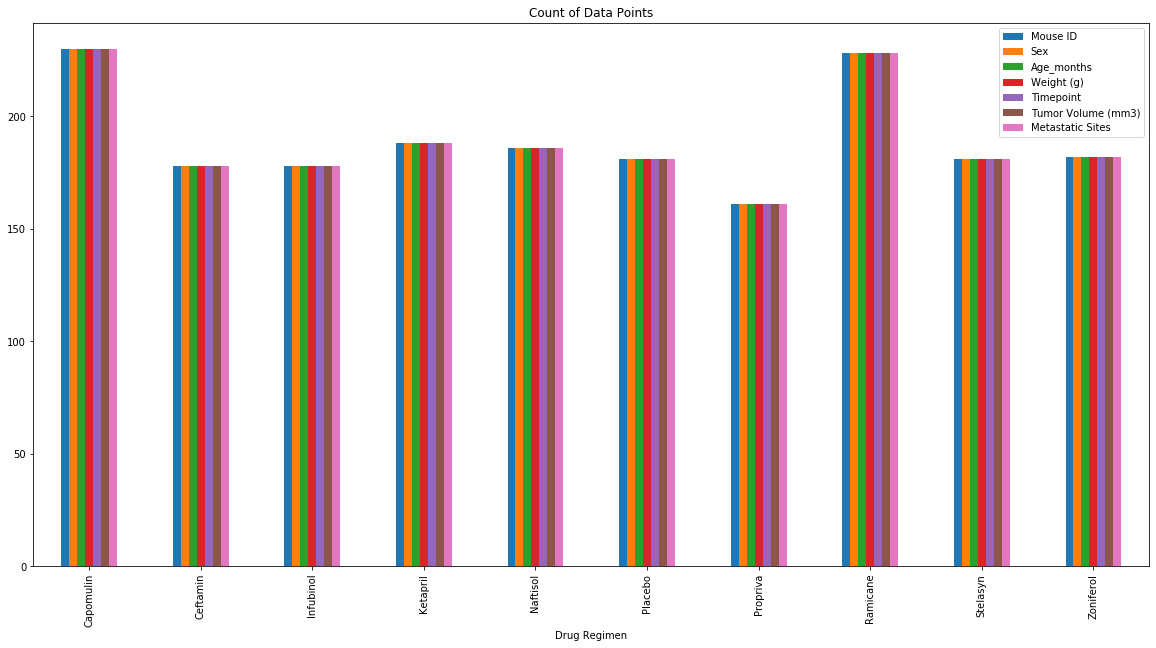

In [177]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

py_bar = pd.DataFrame(drug_group["Mouse ID"].count())

py_bar = pd.merge(py_bar,drug_group["Sex"].count(),left_on = ["Drug Regimen"],right_on = ["Drug Regimen"])

py_bar = pd.merge(py_bar,drug_group["Age_months"].count(),left_on = ["Drug Regimen"],right_on = ["Drug Regimen"])

py_bar = pd.merge(py_bar,drug_group["Weight (g)"].count(),left_on = ["Drug Regimen"],right_on = ["Drug Regimen"])

py_bar = pd.merge(py_bar,drug_group["Timepoint"].count(),left_on = ["Drug Regimen"],right_on = ["Drug Regimen"])


py_bar = pd.merge(py_bar,drug_group["Tumor Volume (mm3)"].count(),left_on = ["Drug Regimen"],right_on = ["Drug Regimen"])

py_bar= pd.merge(py_bar,drug_group["Metastatic Sites"].count(),left_on = ["Drug Regimen"],right_on = ["Drug Regimen"])

py_bar.plot.bar(figsize=(20,10),title = "Count of Data Points")



(-1, 600)

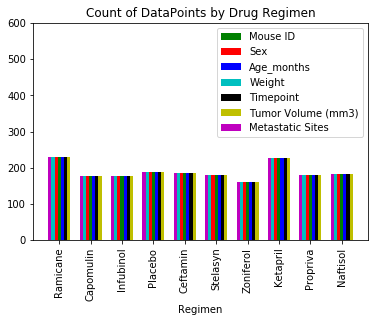

In [178]:
#Generate a bar plot showing number of data points for each treatment regimen using pyplot


x_axis = np.arange(len(mouse_data["Drug Regimen"].unique()))

             
width = 0.1


sex_count = drug_group["Sex"].count()

ID_count = drug_group["Mouse ID"].count()

Age_months_count = drug_group["Age_months"].count()

Weight_count= drug_group["Weight (g)"].count()

Timepoint_count = drug_group["Timepoint"].count()

Tumor_Volume_count = drug_group["Tumor Volume (mm3)"].count()

Metastatic_Sites_count = drug_group["Metastatic Sites"].count()

ax = plt.subplot()

axes = plt.gca()

ax.bar(x_axis,ID_count,  width, color='g', align="center",label ='Mouse ID')

ax.bar(x_axis-width,sex_count, width, color='r', align="center",label ='Sex')

ax.bar(x_axis+width,sex_count, width, color='b', align="center",label ='Age_months')

ax.bar(x_axis-width-width,Weight_count, width, color='c', align="center",label ='Weight')

ax.bar(x_axis+width+width,Timepoint_count, width, color='k', align="center",label ='Timepoint')

ax.bar(x_axis+width+width+width,Tumor_Volume_count, width, color='y', align="center",label ='Tumor Volume (mm3)')

ax.bar(x_axis-width-width-width,Metastatic_Sites_count, width, color='m', align="center",label ='Metastatic Sites')


plt.xticks(x_axis,('Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'),rotation=90)

plt.title("Count of DataPoints by Drug Regimen")

plt.xlabel("Regimen")

plt.legend(loc = 'best')

plt.autoscale()

axes.set_ylim(-1,600)



## Pie plots

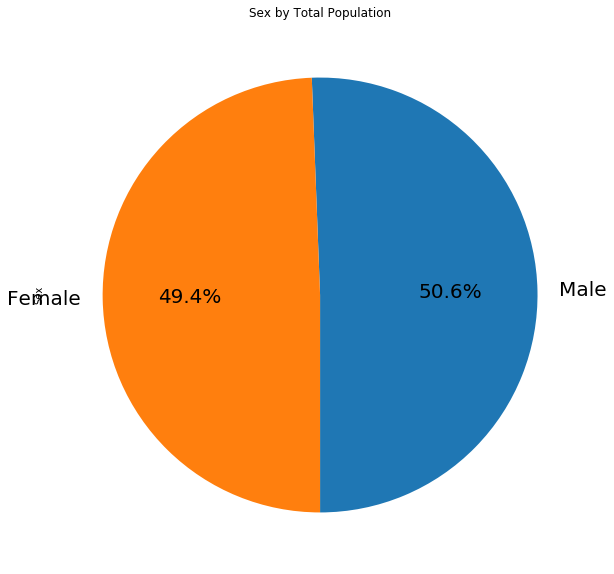

In [179]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

py_pop=mouse_data ["Sex"].value_counts()

ax = plt.subplot(111)

py_pop.plot(kind = 'pie',ax=ax,autopct= '%1.1f%%',startangle=270,fontsize=20,figsize=(10,10),title='Sex by Total Population')




([<matplotlib.patches.Wedge at 0x21234932288>,
 [Text(-0.7536615388097399, -0.933806342299588, 'Male'),
  Text(0.690856410575595, 0.8559891471079556, 'Female')],
 [Text(-0.43963589763901484, -0.5447203663414263, '50.6%'),
  Text(0.3768307694048699, 0.46690317114979385, '49.4%')])

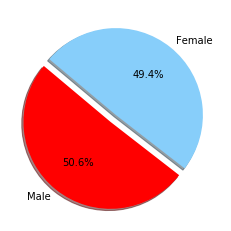

In [180]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart

labels = ['Male','Female']

colors = ["red", "lightskyblue"]

explode = (0.1, 0)

pie = plt.pie(py_pop,labels=labels,colors=colors,explode=explode,autopct= '%1.1f%%', shadow=True, startangle=140)

pie


## Quartiles, outliers and boxplots

In [181]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

tumors_quartile =[]

top_four = ['Ceftamin','Capomulin','Ramicane','Infubinol']

    
top_mouse_data =mouse_data[mouse_data['Drug Regimen'].isin(top_four)]

top_mouse = top_mouse_data.groupby('Mouse ID')

top_mouse = top_mouse['Timepoint'].max()

top_mouse = drug_stat = pd.DataFrame(pd.merge(top_mouse,top_mouse_data,left_on = ["Mouse ID","Timepoint"],right_on = ["Mouse ID","Timepoint"]))

tumors_box = [top_mouse["Tumor Volume (mm3)"].sort_values(ascending=False)]

tumors = pd.DataFrame(top_mouse["Tumor Volume (mm3)"].sort_values(ascending=False))

tumors_quartile = tumors.quantile([.25,.5,.75])

tumors_quartile = {0.25:37.187744,
                  0.50:45.000000,
                  0.75:59.930262}

lowerq = tumors_quartile[0.25]
upperq = tumors_quartile[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volume is: {lowerq}")
print(f"The upper quartile of final tumor volume is: {upperq}")
print(f"The interquartile range of final tumor volume is: {iqr}")
print(f"The the median of final tumor volume is: {tumors_quartile[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The lower quartile of final tumor volume is: 37.187744
The upper quartile of final tumor volume is: 59.930262
The interquartile range of final tumor volume is: 22.742517999999997
The the median of final tumor volume is: 45.0
Values below 3.0739670000000032 could be outliers.
Values above 94.044039 could be outliers.


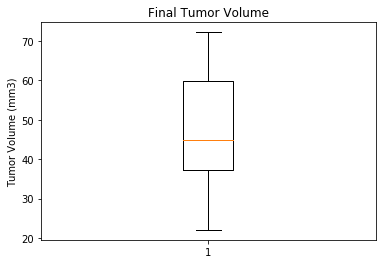

In [182]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumors_box)
plt.show()

## Line and scatter plots

Text(0, 0.5, 'Tumor Volume (mm3)')

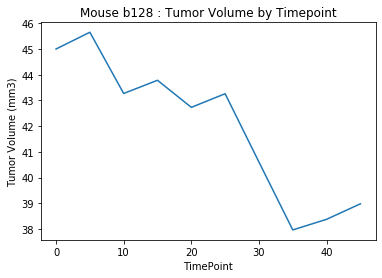

In [183]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

x_axis = [0,5,10,15,20,25,30,35,40,45]

y_axis = [45,45.65133131,43.2708519,43.78489343,42.731552,43.26214483,40.60533486,37.96764437,38.3797259,38.98287774]

plt.plot(x_axis, y_axis)

plt.show

plt.title("Mouse b128 : Tumor Volume by Timepoint")

plt.xlabel("TimePoint")

plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

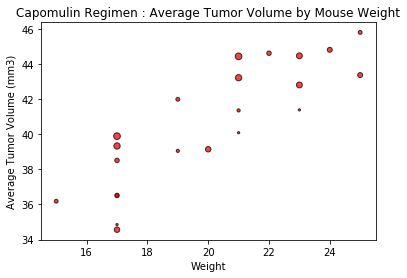

In [144]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mouse_group = drug_group['Mouse ID'].unique()

cap_data = mouse_data[mouse_data['Mouse ID'].isin(mouse_group["Capomulin"])]

cap_group = cap_data.groupby("Mouse ID")

cap_weight = cap_group["Weight (g)"].unique()

cap_weight

cap_avg = cap_group["Tumor Volume (mm3)"].mean()

cap_avg

plt.scatter(cap_weight, cap_avg, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)

plt.title("Capomulin Regimen : Average Tumor Volume by Mouse Weight")

plt.xlabel("Weight")

plt.ylabel("Average Tumor Volume (mm3)")


The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84.
The r-squared is: 0.8419363424694718


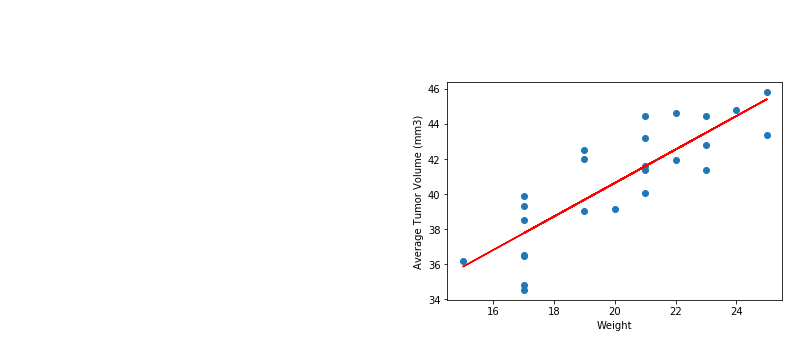

In [195]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen



cap_data = mouse_data[mouse_data['Drug Regimen'] == "Capomulin"]

# st.pearsonr(cap_weight, cap_avg)

list_weight = [float(x) for x in cap_weight]

list_avg = [float(x) for x in cap_avg]

print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(list_weight, list_avg)[0],2)}.")


x_values = list_weight
y_values = list_avg
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = [x * slope + intercept for x in x_values]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue}")
plt.show()